In [1]:
import numpy as np
from matplotlib import pyplot as plt

img_array = np.load('binary_image.npy')

b = img_array.reshape(-1)  #Converting 110x100 array to 1D-array of size 11000.
#print(b)



T = 10**(-6)  #T = 1 microseconds
fc = 2*(10**(6)) # Carrier frequency = 2MHz

fs = 50*(10**(6)) # Sampling rate of fs =  4MHz.
total_samples = fs*(0.0055) #The total number of samples of r(t) will be fs × 0.0055 = 22000, since the communication duration is 5.5 m sec.


c = np.zeros((5500,50))
for i in range(0,5500):
	c[i] = np.linspace((i)*T,(i+0.999)*T,50) #each c[i] representing time range : i*T <= t <=(i+1)*T 
#print(c[0])


x = np.zeros(11000)  
for j in range(0,11000):
	if(b[j] == 0):
		x[j] = 1
	if (b[j] == 1):
		x[j] = -1


#print(x)

s = np.zeros((5500,50))
for i in range(0,5500):
	for j in range(0,50):
		s[i][j] = x[2*i]*np.cos(2*np.pi*fc*c[i][j])  + x[(2*i) + 1]*np.sin(2*np.pi*fc*c[i][j])
#print(s)

redefined_s = s.reshape(-1)
print("Transmitted Bit Sequence is",redefined_s)
#Take Eg = 1,therefore the value of Eb = Eg/2 i.e. Eb = 1/2
Eb = (10**(-6))/2
No = Eb/(10**(0.5)) #Considering last case in Eb /No : −10, −5, 0, 5 dB
#Producing AWGN channel :
#Noise variance = No/2

 

variance = fs*(No/2)

mu, sigma = 0, np.sqrt(variance) # mean and standard deviation
noise = np.random.normal(mu, sigma, int(total_samples))
noise_reformed = noise.reshape(5500,50)
r_reformed = s + noise_reformed
#print(r_reformed)  #	In this r_reformed[0] indicates sequence from r[0] to r[49].
#print(noise.shape)

r = redefined_s + noise
print("Received Bit Sequence is",r)

#print(r.shape)

# fs x T = 50 in this case . i.e., samples r[0], . . . , r[49] correspond to bits b 1 and b 2 ; the next 50 samples correspond to bits b 3 and b 4 , and so on
def distances(Array1,Array2):
	c = Array1 - Array2
	s = 0
	for i in range(Array1.size):
		s = s +(c[i])**2
	return np.sqrt(s)

sub_array = np.zeros((5500,5500))
Received_s = np.zeros(5500)
for i in range(0,5500):
	for j in range(0,5500):
		sub_array[i][j] = distances(r_reformed[i] ,s[j])
	Received_s[i] = np.argmin(sub_array[i])
print(Received_s)



#To be continued...

Transmitted Bit Sequence is [-1.         -1.22076639 -1.36184086 ...  0.36415666  0.69855681
  0.987355  ]
Received Bit Sequence is [-2.22495848 -3.04533118  0.43813769 ... -0.01068439  2.15003358
 -0.43688084]
[1002. 3121. 1976. ... 5255. 5360. 5256.]


In [2]:
print(redefined_s[1002])

-1.3618408616621576


In [9]:
for i in Received_s:
    print(int(i))
    

1002
3121
1976
5067
4323
3307
4021
1415
737
3307
4916
3366
1371
1420
2767
4374
4916
3811
3876
3962
4426
4473
4374
1963
4460
2709
1371
4426
4021
2618
4916
4426
4916
2666
4524
5065
536
3872
3771
1849
3379
1304
3677
2915
1415
4864
3170
5065
4426
1322
4774
3376
3876
3229
4864
4263
3526
1998
3820
3078
4165
4864
3474
4426
4916
4472
4916
4426
3962
687
2659
1670
3258
1371
3768
3258
1371
3962
4021
4223
1849
4374
4864
4916
4511
4426
3916
1495
3366
3121
3962
3121
3415
2025
1966
1999
3962
4864
3771
4314
3366
4511
4713
4864
4113
2915
4661
4864
4916
4916
2660
4661
4511
3660
4813
3876
3121
4113
3621
3598
3321
3820
3621
1443
5067
3072
4426
4262
5065
4864
1972
992
1371
3962
4916
2657
3962
4864
1423
2226
3170
2611
4113
2608
4818
4916
1467
1371
2667
4864
2667
1897
3962
4426
4916
4773
1371
4713
3916
3513
4262
4713
4021
4472
3827
2964
1322
3209
3962
4510
2660
4426
2177
4472
3820
3078
4313
4314
4916
3660
3072
3474
1995
3962
1696
3317
4864
4524
4864
2660
4864
4814
5014
4021
3876
2617
3962
1999
3916
5067
2012

4773
3114
3674
4864
4510
2607
4864
4524
5067
1518
3709
4426
4916
4263
3621
1322
4661
3960
4864
4869
3924
652
2755
5301
5392
1407
375
5484
5282
5465
3794
5431
4844
5276
5419
5308
5315
5282
5497
5243
1989
1431
5432
2028
4439
5223
5334
4942
5315
5327
3811
1443
3709
4916
5014
3513
4916
1402
1095
3827
1046
3962
2004
5307
5283
4210
4661
4223
3258
3575
4576
3949
5406
5243
5361
4648
2693
2105
4942
5282
5373
5360
5288
1407
5315
3483
5432
5329
5445
4027
5380
5325
5307
1704
1992
3988
5380
5419
5430
5282
4426
4868
3960
3827
1157
4014
2659
3962
4916
4426
3758
3067
5401
5430
5412
4439
5419
5307
5257
5334
5301
5491
5432
4439
5315
3988
5432
5380
5231
5328
5288
5373
1992
2631
5334
5334
5373
5445
2644
1487
4439
5224
5419
4013
5263
5445
5432
3949
5242
5491
4812
3471
2915
5491
5329
5445
3807
2618
3962
3307
4916
3530
5282
2030
5225
5315
5040
5347
5412
5491
2670
5444
4439
4243
4439
5452
3856
2693
5327
4243
5223
1732
5243
5334
1064
5464
5255
5491
4439
5472
2035
3739
5367
5329
5253
5465
1327
5464
2041
5327
54

5283
5288
781
5243
5216
5465
4145
5223
5474
5255
5360
5256


In [10]:
b_received = np.zeros(11000)
j = 0
for i in Received_s:
        b_received[2*j] = b[2*int(i)]
        b_received[(2*j)+1] = b[(2*int(i))+1]
        j= j+1
print(b_received)
    

[1. 1. 1. ... 0. 0. 0.]


In [11]:
for i in b_received:
    print(i)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0


In [12]:
image_array_received = b_received.reshape(110,100)

In [13]:
print(image_array_received)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


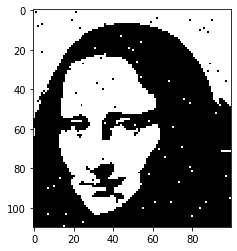

In [15]:
plt.imshow(image_array_received,'gray')

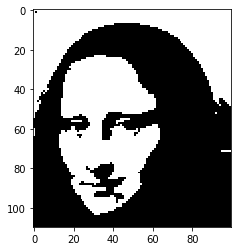

In [16]:
plt.imshow(img_array,'gray')

In [17]:
error_bits = b_received - b
print(error_bits)

[0. 0. 0. ... 0. 0. 0.]


In [18]:
for i in error_bits:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [21]:
total_error_bits = 0
for i in range(11000):
    if(error_bits[i] != 0):
        total_error_bits +=1
print("No.of pixels that are wrongly pointed :",total_error_bits)
    

No.of pixels that are wrongly pointed : 67


In [10]:
import numpy as np
from matplotlib import pyplot as plt

def MainFunction(EbNo):  # EbNo = Eb/No in dB
    img_array = np.load('binary_image.npy')

    b = img_array.reshape(-1)  #Converting 110x100 array to 1D-array of size 11000.
    print("Transmitted bit sequence:",b)
    T = 10**(-6)  #T = 1 microseconds
    fc = 2*(10**(6)) # Carrier frequency = 2MHz

    fs = 50*(10**(6)) # Sampling rate of fs =  4MHz.
    total_samples = fs*(0.0055) #The total number of samples of r(t) will be fs × 0.0055 = 22000, since the communication duration is 5.5 m sec.


    c = np.zeros((5500,50))
    for i in range(0,5500):
        c[i] = np.linspace((i)*T,(i+0.999)*T,50) #each c[i] representing time range : i*T <= t <=(i+1)*T 
    #print(c[0])


    x = np.zeros(11000)  
    for j in range(0,11000):
        if(b[j] == 0):
            x[j] = 1
        if (b[j] == 1):
            x[j] = -1


    #print(x)

    s = np.zeros((5500,50))
    for i in range(0,5500):
        for j in range(0,50):
            s[i][j] = x[2*i]*np.cos(2*np.pi*fc*c[i][j])  + x[(2*i) + 1]*np.sin(2*np.pi*fc*c[i][j])
    #print(s)

    redefined_s = s.reshape(-1)
    print("Transmitted Waveform (in terms of discrete values) is given by :",redefined_s)
    #Take Eg = 1,therefore the value of Eb = Eg/2 i.e. Eb = 1/2
    Eb = (10**(-6))/2   # Eb = T/2
    No = Eb/(10**(EbNo/10)) #Considering last case in Eb /No : −10, −5, 0, 5 dB
    #Producing AWGN channel :
    #Noise variance = No/2



    variance = fs*(No/2)

    mu, sigma = 0, np.sqrt(variance) # mean and standard deviation
    noise = np.random.normal(mu, sigma, int(total_samples))
    noise_reformed = noise.reshape(5500,50)
    r_reformed = s + noise_reformed
    #print(r_reformed)  #	In this r_reformed[0] indicates sequence from r[0] to r[49].
    #print(noise.shape)

    r = redefined_s + noise
    print("Received Waveform (in terms of discrete values) is given by :",r)

    #print(r.shape)

    # fs x T = 50 in this case . i.e., samples r[0], . . . , r[49] correspond to bits b 1 and b 2 ; the next 50 samples correspond to bits b 3 and b 4 , and so on
    def distances(Array1,Array2):
        c = Array1 - Array2
        s = 0
        for i in range(Array1.size):
            s = s +(c[i])**2
        return np.sqrt(s)

    sub_array = np.zeros((5500,5500))
    Received_s = np.zeros(5500)
    for i in range(0,5500):
        for j in range(0,5500):
            sub_array[i][j] = distances(r_reformed[i] ,s[j])
        Received_s[i] = np.argmin(sub_array[i])
    #print("Received_s :",Received_s)
    
    b_received = np.zeros(11000)
    j = 0
    for i in Received_s:
            b_received[2*j] = b[2*int(i)]
            b_received[(2*j)+1] = b[(2*int(i))+1]
            j= j+1
    print("Received Bit Sequence:",b_received)
    image_array_received = b_received.reshape(110,100)
    plt.imshow(image_array_received,'gray')
    plt.title("Received Image at Eb/No = "+str(EbNo)+"dB")
    error_bits = b_received - b
    total_error_bits = 0
    for i in range(11000):
        if(error_bits[i] != 0):
            total_error_bits +=1
    print("No.of pixels that are wrongly pointed :",total_error_bits)



Transmitted bit sequence: [1 1 1 ... 0 0 0]
Transmitted Bit Sequence is [-1.         -1.22076639 -1.36184086 ...  0.36415666  0.69855681
  0.987355  ]
Received Bit Sequence is [-3.78331968 -1.58530459 -2.02053865 ... -3.48954096  3.31757543
 -0.97407422]
Received_s : [3962. 3916. 4113. ... 1732. 4145. 5263.]
Received bit sequence: [1. 1. 1. ... 0. 0. 0.]
No.of pixels that are wrongly pointed : 64


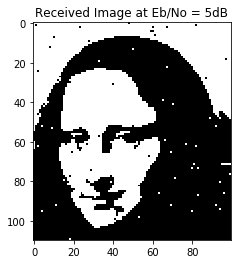

In [11]:
MainFunction(5)

Text(0.5, 1.0, 'hi5')

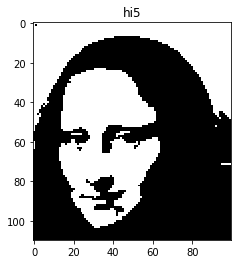

In [9]:
i = 5
img_array = np.load('binary_image.npy')
plt.imshow(img_array,'gray')
plt.title("hi"+str(i))

Text(0.5, 1.0, 'hi')

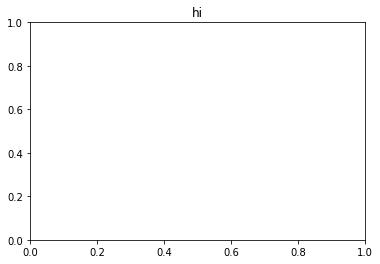

In [5]:
plt.title("hi")